<a href="https://colab.research.google.com/github/bhawana-khajuria/Data-Analytics/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### **Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]**

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

---
## **(i) Create dataset**

---

In [4]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))

# Replace values between 10 and 60 with NaN
df_masked = df.mask((df >= 10) & (df <= 60))

# Count rows with missing values
rows_with_na = df_masked.isnull().any(axis=1).sum()
print(f"(i) Rows with missing values: {rows_with_na}")

(i) Rows with missing values: 100


### **(ii) Replace NA with column average**

In [5]:
df_filled = df_masked.fillna(df_masked.mean(numeric_only=True))

### **(iii) Pearson correlation and heatmap**

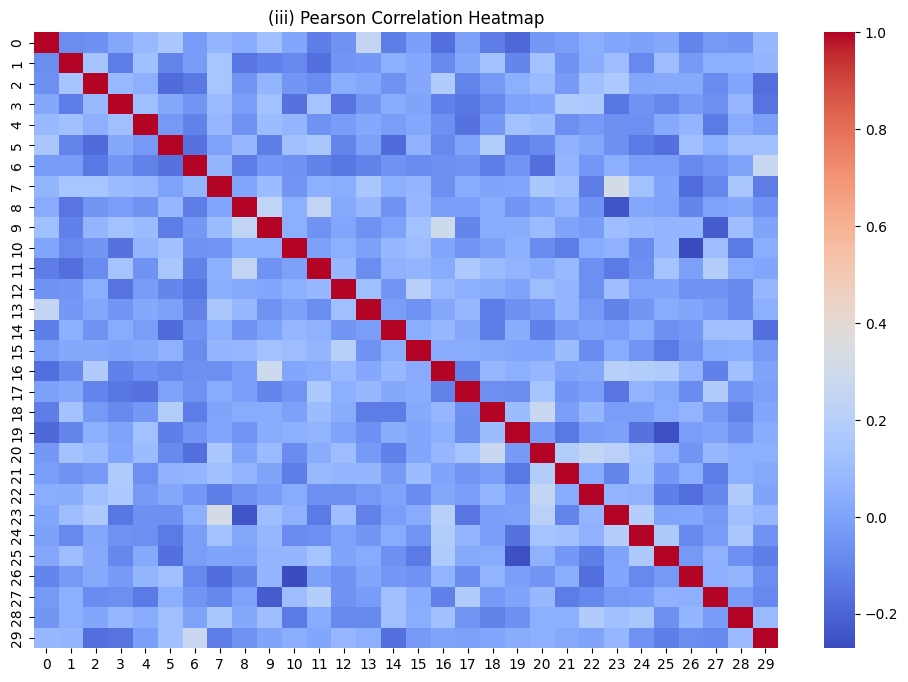

(iii) Columns with correlation <= 0.7:
[]


In [7]:
corr_matrix = df_filled.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('(iii) Pearson Correlation Heatmap')
plt.show()

# Select columns with correlation <= 0.7
selected_columns = corr_matrix.columns[(corr_matrix.abs() <= 0.7).all()]
print("(iii) Columns with correlation <= 0.7:")
print(selected_columns.tolist())

### **(iv) Normalize values to [0, 10]**

In [8]:
scaler = MinMaxScaler(feature_range=(0, 10))
df_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df.columns)

### **(v) Replace values <= 0.5 with 1, else with 0**

In [10]:

# (v) Replace values <= 0.5 with 1, else with 0
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)

/tmp/ipython-input-10-4263962914.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


---
### **Q13. Clustering on Mixed Range Data**

---


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
#Create dataset
np.random.seed(0)
data_q13 = pd.DataFrame({
    **{f'col{i+1}': np.random.uniform(-10, 10, 500) for i in range(4)},
    **{f'col{i+5}': np.random.uniform(10, 20, 500) for i in range(4)},
    **{f'col{i+9}': np.random.uniform(-100, 100, 500) for i in range(2)},
})

# Normalize before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_q13)

---
**(i) KMeans - Elbow method**

---

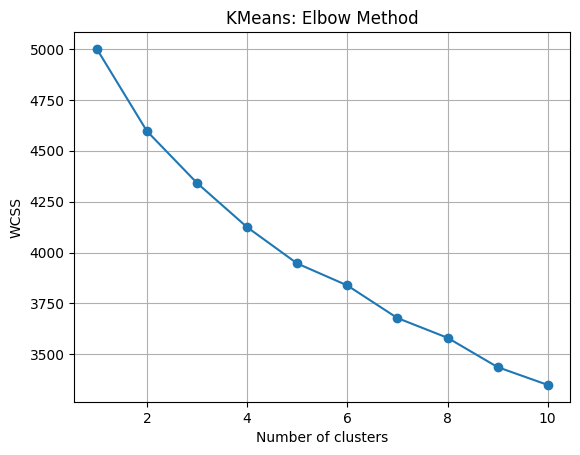

In [15]:

# (i) KMeans - Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('KMeans: Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

---
### **(ii) Hierarchical clustering - Dendrogram**
---

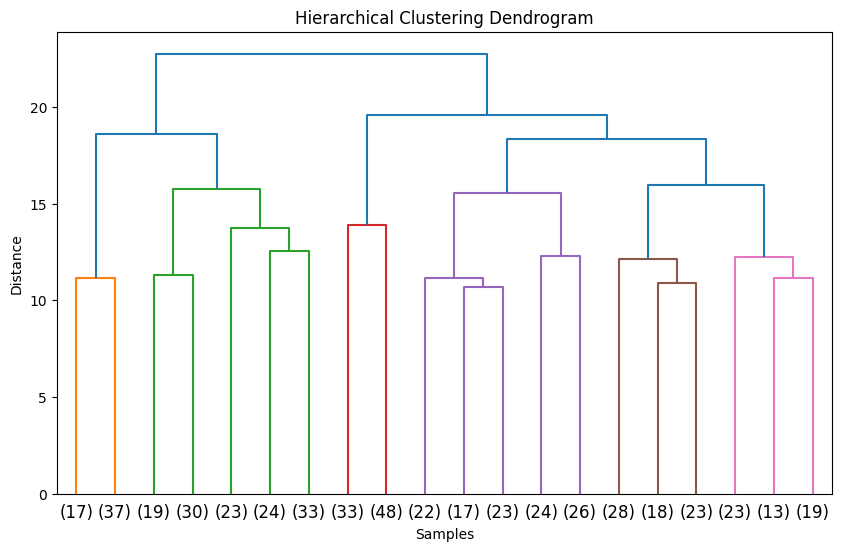

In [16]:
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

---
**Q14: Dataset of 600 rows & 15 columns (values in [-100, 100])**

---

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate dataset
np.random.seed(0)
df_14 = pd.DataFrame(np.random.uniform(-100, 100, size=(600, 15)), columns=[f'col_{i+1}' for i in range(15)])

---
### **(i) Scatter plot between Column 5 and Column 6**

---

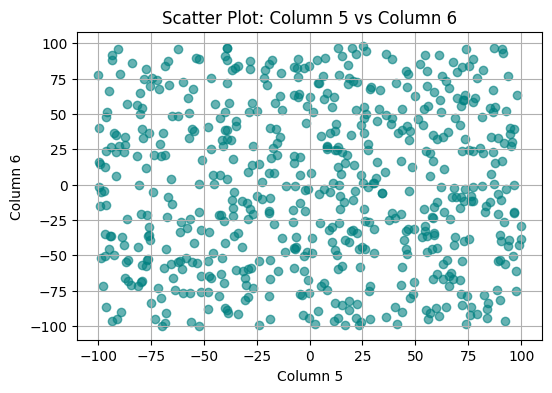

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(df_14['col_5'], df_14['col_6'], alpha=0.6, color='teal')
plt.title("Scatter Plot: Column 5 vs Column 6")
plt.xlabel("Column 5")
plt.ylabel("Column 6")
plt.grid(True)
plt.show()

---
### **(ii) Histogram of all columns in one graph**

---

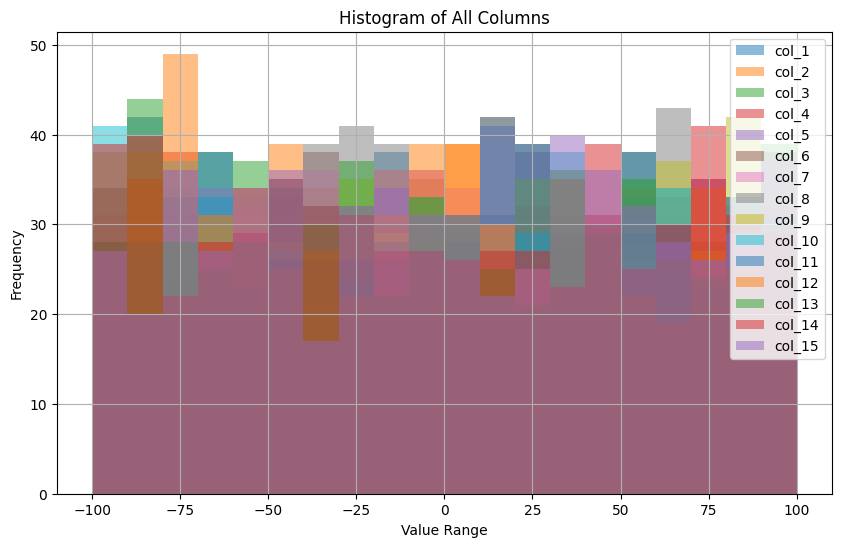

In [20]:
# (ii) Histogram of all columns in one graph
df_14.plot(kind='hist', bins=20, figsize=(10, 6), alpha=0.5, legend=True, title="Histogram of All Columns")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

---
**(iii) Box plot of each column**

---

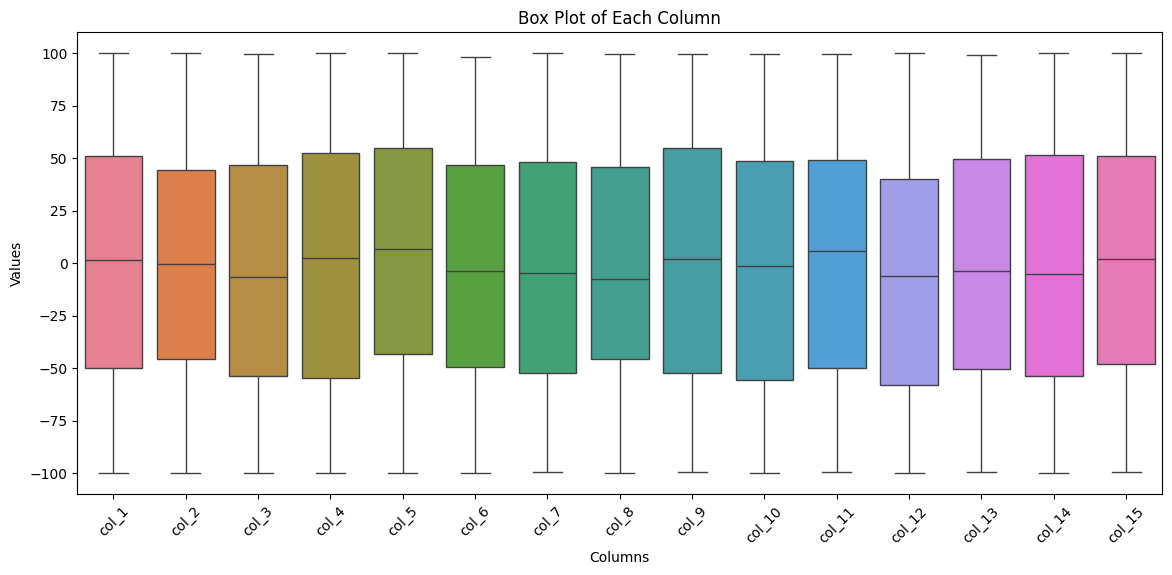

In [21]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_14)
plt.title("Box Plot of Each Column")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

---
**Q15: Dataset of 500 rows & 5 columns (values in [5, 10])**

---

In [22]:
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

# Generate dataset
np.random.seed(1)
df_15 = pd.DataFrame(np.random.uniform(5, 10, size=(500, 5)), columns=[f'col_{i+1}' for i in range(5)])

---
### **(i) One-Sample t-Test for each column (test mean ≠ 7.5)**

---

In [23]:
# (i) One-Sample t-Test for each column (test mean ≠ 7.5)
print("(i) One-Sample t-Test (H0: mean = 7.5):")
for col in df_15.columns:
    t_stat, p_val = ttest_1samp(df_15[col], popmean=7.5)
    print(f"{col}: t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")

(i) One-Sample t-Test (H0: mean = 7.5):
col_1: t-stat = -1.2586, p-value = 0.2088
col_2: t-stat = 1.9248, p-value = 0.0548
col_3: t-stat = -0.3487, p-value = 0.7275
col_4: t-stat = 0.1412, p-value = 0.8878
col_5: t-stat = 0.6920, p-value = 0.4892


---
### **(ii) Wilcoxon Signed Rank Test for each column (vs mean=7.5)**
---

In [24]:
print("\n(ii) Wilcoxon Signed Rank Test (H0: median = 7.5):")
for col in df_15.columns:
    try:
        stat, p_val = wilcoxon(df_15[col] - 7.5)
        print(f"{col}: W = {stat:.4f}, p-value = {p_val:.4f}")
    except Exception as e:
        print(f"{col}: Error - {e}")


(ii) Wilcoxon Signed Rank Test (H0: median = 7.5):
col_1: W = 58505.0000, p-value = 0.2024
col_2: W = 56437.0000, p-value = 0.0556
col_3: W = 61483.0000, p-value = 0.7239
col_4: W = 62096.0000, p-value = 0.8700
col_5: W = 60430.0000, p-value = 0.4971


---
### **(iii) Two-Sample t-Test and Wilcoxon Rank Sum Test between Column 3 and Column 4**
---

In [25]:
print("\n(iii) Two Sample Tests: Column 3 vs Column 4")
col3 = df_15['col_3']
col4 = df_15['col_4']

t_stat, t_p = ttest_ind(col3, col4)
rs_stat, rs_p = ranksums(col3, col4)

print(f"t-Test: t-stat = {t_stat:.4f}, p-value = {t_p:.4f}")
print(f"Wilcoxon Rank Sum Test: stat = {rs_stat:.4f}, p-value = {rs_p:.4f}")


(iii) Two Sample Tests: Column 3 vs Column 4
t-Test: t-stat = -0.3461, p-value = 0.7294
Wilcoxon Rank Sum Test: stat = -0.3920, p-value = 0.6951
